In [22]:
# Importing all the important header files
import snap
import numpy as np
import operator
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy.linalg


# path of the dataset folder 
path = "/home/dawg/Documents/Semester-5/CS544/Project/Snap/Data_higgs/"



In [23]:
# Importing the Dataset for Snap Graph
g_snap = snap.LoadEdgeList(snap.PNGraph, path+"higgs-retweet_network.edgelist" ,0 ,1)

In [24]:
# displaying the properties of network
print "Number of Nodes: " ,g_snap.GetNodes()
print "Number of Edges: " ,g_snap.GetEdges()


Number of Nodes:  256491
Number of Edges:  328132


In [25]:
# importing the graph for networkx library
# g_nx = 
# defining the graph 
g_nx = nx.DiGraph()
print "Starting the Data extraction: "
with open(path+"higgs-retweet_network.edgelist", 'rb') as fil:
	a = fil.readline()
	while a:
		dest, src,weight = a.split(" ")
		# print dest, src , weight
		dest = int(dest)
		src = int(src)
		weight = int(weight)
		g_nx.add_edge(dest, src) # g_nx is the graph
		a = fil.readline()

print "Graph extraction complete"
outDeg =  list(g_nx.out_degree([i for i in range(len(g_nx))]).values())
inDeg = list(g_nx.in_degree([i for i in range(len(g_nx))]).values())


Starting the Data extraction: 
Graph extraction complete


In [26]:
print "Number of Nodes: ",g_nx.number_of_nodes()
print "Number of Edges: ",g_nx.number_of_edges()


Number of Nodes:  256491
Number of Edges:  328132


Here we are using two different librarie as we are using the pagerank algorithm as well as the katz centrality which is only availbale in each of the libraries.

In [9]:
#plotting the indegree and outdegree of the graph
bins = [0,1,2,3,4,5,6,7,8,9,10];
plt.hist(inDeg, bins, histtype= "bar");

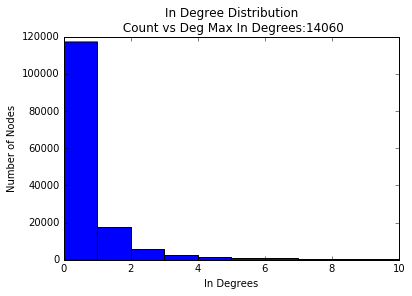

In [10]:
plt.xlabel('In Degrees')
plt.ylabel('Number of Nodes')
plt.title('In Degree Distribution\n Count vs Deg Max In Degrees:' + str(max(inDeg)))
plt.show()

In [11]:
#plotting the indegree and outdegree of the graph
bins = [0,1,2,3,4,5,6,7,8,9,10];
plt.hist(outDeg, bins, histtype= "bar");

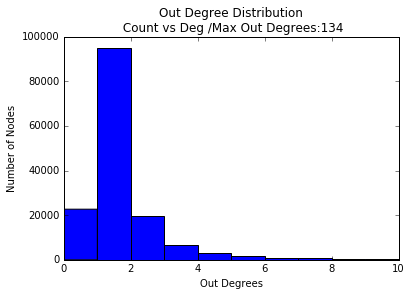

In [12]:
plt.xlabel('Out Degrees')
plt.ylabel('Number of Nodes')
plt.title('Out Degree Distribution\n Count vs Deg /Max Out Degrees:' + str(max(outDeg)))
plt.show()

As we can see in the graph that there are severel nodes which habe in Degree of 1 => there are very large number of people who have very small retweets.
In the scene of Out Degree we can see that most of people have preffered to retweet two tweets and not one, this may affect the importance of node.


In [27]:
# extracting the follower data
node_id = [] # store the nodeid
node_follower = [] # store the node follower for same
print "Starting the Data extraction: "
with open(path+"followersout.txt", 'rb') as fil:
    a = fil.readline()
#     print a.split()
    while a:
#         print a.split()
        nodeid, follower= a.split()
#         print a.split()
        # print dest, src , weight
        nodeid = int(nodeid)
        follower = int(follower)
        node_id.append(nodeid)
        node_follower.append(follower)
        a = fil.readline()


Starting the Data extraction: 


In [14]:
plt.hist(node_follower,bins = 50, histtype= "bar");

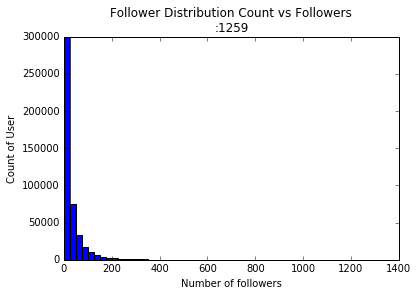

In [15]:
plt.xlabel('Number of followers')
plt.ylabel('Count of User')
plt.title('Follower Distribution Count vs Followers\n:' + str(max(node_follower)))
plt.show()

As we can see power law is being followed by the network
Now we will start with the centrality measures
We will use two centrality measures
1. PageRank
2. Katz Centrality

In [28]:
# Page Rank,for this we will be using SNAP library
PGHash = snap.TIntFltH() # hash to store the Page Rank
snap.GetPageRank(g_snap, PGHash, 0.85, 1e-4, 100)
#C=0.85, Eps=1e-4, MaxIter=100

x = dict()
for item in PGHash: # converting from hash of snap to python dictionary
	x[item] = PGHash[item]
	# PageRank[i][0] = item
	# PageRank[i][1] = rankh[item]

# Make a 2D matrix with (id, page rank value) sorted using the page rank
# value of the nodes
sorted_x = sorted(x.items(), key=operator.itemgetter(1)) 

ids = [] # individual lists for ease
pgids = []
print len(sorted_x)
for i in range(len(sorted_x)):
	ids.append(sorted_x[i][0])
	pgids.append(sorted_x[i][1])

256491


In [29]:
# print PageRank
print "The top five Influencers of Network Based on Page Rank Centrality "
nodes_pg = []
for i in range(1,11):
    print "ID: %d, Page Rank Value : %f"%(sorted_x[-i][0], sorted_x[-i][1])
    nodes_pg.append(sorted_x[-i][0])


The top five Influencers of Network Based on Page Rank Centrality 
ID: 88, Page Rank Value : 0.025392
ID: 2342, Page Rank Value : 0.014608
ID: 64911, Page Rank Value : 0.009107
ID: 39420, Page Rank Value : 0.007351
ID: 14454, Page Rank Value : 0.007130
ID: 677, Page Rank Value : 0.006980
ID: 2567, Page Rank Value : 0.006419
ID: 134095, Page Rank Value : 0.006238
ID: 169287, Page Rank Value : 0.006213
ID: 1988, Page Rank Value : 0.005744


In [18]:
# plot the scatter plot for centrailty measures along side the user ids
plt.scatter(ids, pgids, label="PageRank Values");
line_y = [sorted_x[-10][1] for i in range(0,500000)];
line_x = [i for i in range(0,500000)];
plt.plot(line_x, line_y,'r-',linewidth=1.0, label="Top 10 Influencers");
line_y = [sorted_x[-20][1] for i in range(0,500000)];
line_x = [i for i in range(0,500000)];
plt.plot(line_x, line_y,'g--',linewidth=1.0,label="Top 20 Influencers");

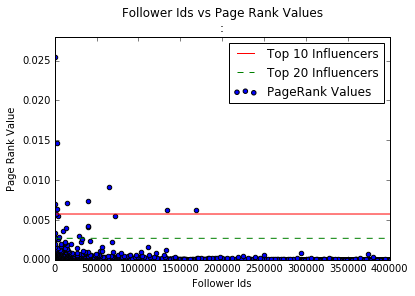

In [19]:
plt.xlabel('Twitter Ids')
plt.ylabel('Page Rank Value')
plt.title('Twitter Ids vs Page Rank Values\n:')
plt.ylim([0.0 , 0.02800])
plt.xlim([0 , 400000])
plt.legend()
plt.show()

So as we can see we get clear  influencers in the network i.e. User ID : 88 is the clear influencer in the network with a very high Page Rank Value 0.025392. The graph clearly shows that the majority of people are influenced by a small number of nodes

In [29]:
print node_id[0:10]
print node_follower[0:10]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[22, 77, 25, 402, 58, 101, 99, 54, 29, 305]


In [1]:
# over here we will compare the followers vs Page Rank value
print len(sorted_x)
for i in range(len(sorted_x)):
    plt.scatter(node_follower[sorted_x[i][0] -1], sorted_x[i][1])
    if i%100000 == 0 :
        print i," : processed"
    
#     plt.plot(node_follower[i],PGHash[i+1])
    
    


NameError: name 'sorted_x' is not defined

In [ ]:
plt.xlabel('Number of Followers')
plt.ylabel('Page Rank Value')
plt.title('Number of Follower vs Page Rank Values\n:')
plt.ylim([0.0 , 0.02800])
# plt.xlim([0 , 400000])
plt.legend()
plt.show()


Now we will measure the influence based on Katz centrality.
Katz doest consider the degree of the node i.e the number of follower 
wont be affecting the result in any way

In [ ]:
# import networkx as nx
# import numpy.linalg
# import matplotlib.pyplot as plt

# n = 1000 # 1000 nodes
# m = 5000 # 5000 edges
# G = nx.gnm_random_graph(n,m)

# L = nx.normalized_laplacian_matrix(G)
# e = numpy.linalg.eigvals(L.A)

In [9]:
# # eigenvalues(g_nx)
# L = nx.normalized_laplacian_matrix(g_nx)
# ---------------------------------------------------------------------------
# NetworkXNotImplemented                    Traceback (most recent call last)
# <ipython-input-8-a09a76478cc8> in <module>()
#       1 # eigenvalues(g_nx)
# ----> 2 L = nx.normalized_laplacian_matrix(g_nx)

# /usr/local/lib/python2.7/dist-packages/networkx/linalg/laplacianmatrix.pyc in normalized_laplacian_matrix(G, nodelist, weight)

# /usr/local/lib/python2.7/dist-packages/networkx/utils/decorators.pyc in _not_implemented_for(f, *args, **kwargs)
#      64         if match:
#      65             raise nx.NetworkXNotImplemented('not implemented for %s type'%
# ---> 66                                             ' '.join(graph_types))
#      67         else:
#      68             return f(*args,**kwargs)

# NetworkXNotImplemented: not implemented for directed type


SyntaxError: invalid syntax (<ipython-input-9-3058fdde3a36>, line 3)

In [43]:
katz = nx.katz_centrality(g_nx)
ids2 = [] # individual lists for ease
katzids = []
sorted_katz = sorted(katz.items(), key=operator.itemgetter(1))
print len(sorted_katz)
for i in range(len(sorted_katz)):
	ids2.append(sorted_katz[i][0])
	katzids.append(sorted_katz[i][1])

256491


In [16]:
# max(stats.iteritems(), key=operator.itemgetter(1))[0]
maximum = max(katz, key=katz.get)  # Just use 'min' instead of 'max' for minimum.
print(maximum, katz[maximum])

(88, 0.6837871340141356)


As we can clearliy see over here also the most infleuntial node is of ID 88 which matches our result from the page rank data

In [31]:
# print Katz
print "The top 10 Influencers of Network Based on Katz Centrality "
nodes_katz = []
for i in range(1,11):
    print "ID: %d, Katz Value : %f"%(sorted_katz[-i][0], sorted_katz[-i][1])
    nodes_katz.append(sorted_katz[-i][0])

The top 10 Influencers of Network Based on Katz Centrality 
ID: 88, Katz Value : 0.683787
ID: 677, Katz Value : 0.228995
ID: 1988, Katz Value : 0.202322
ID: 14454, Katz Value : 0.200034
ID: 3998, Katz Value : 0.158585
ID: 64911, Katz Value : 0.142780
ID: 11991, Katz Value : 0.127363
ID: 349, Katz Value : 0.121483
ID: 5226, Katz Value : 0.119663
ID: 42172, Katz Value : 0.113589


In [35]:
# >>> set(a).intersection(b)
# set([5])
print nodes_pg
print nodes_katz



[88, 2342, 64911, 39420, 14454, 677, 2567, 134095, 169287, 1988]
[88, 677, 1988, 14454, 3998, 64911, 11991, 349, 5226, 42172]


In [42]:
print "The Common Nodes between the 2 measures is ",set(nodes_pg).intersection(nodes_katz)
print str(len(set(nodes_pg).intersection(nodes_katz))) + "  nodes are common"

The Common Nodes between the 2 measures is  set([88, 1988, 677, 14454, 64911])
5  nodes are common


In [46]:
# plot the scatter plot for centrailty measures along side the user ids
plt.scatter(ids2, katzids, label="Katz Values");
line_y = [sorted_katz[-10][1] for i in range(0,500000)];
line_x = [i for i in range(0,500000)];
plt.plot(line_x, line_y,'r-',linewidth=1.0, label="Top 10 Influencers");
line_y = [sorted_katz[-20][1] for i in range(0,500000)];
line_x = [i for i in range(0,500000)];
plt.plot(line_x, line_y,'g--',linewidth=1.0,label="Top 20 Influencers");

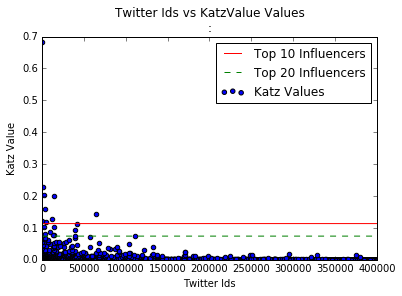

In [47]:
plt.xlabel('Twitter Ids')
plt.ylabel('Katz Value')
plt.title('Twitter Ids vs KatzValue Values\n:')
plt.ylim([0.0 , 0.7])
plt.xlim([0 , 400000])
plt.legend()
plt.show()

It is quite clear from the Results the Node 88 is the most infuetial node in the network with following statistics

In [68]:
print "Node Number: " ,node_id[87]
print "Node Out Degree: ", g_nx.out_degree(88)
print "Node In Degree: ", g_nx.in_degree(88)
print "Page Rank Value: ",x[88]
print "Katz Value: ", katz[88]

Node Number:  88
Node Out Degree:  3
Node In Degree:  14060
Page Rank Value:  0.0253917651746
Katz Value:  0.683787134014


EXTRA : Now we will intialisee the intial values based on the number of followers and check the result

In [58]:
dict_nodes = dict()
for i in ids:
    dict_nodes[i] = node_follower[i-1]


In [59]:
katz2 = nx.katz_centrality(g_nx,0.1, dict_nodes)

In [62]:
ids3 = [] # individual lists for ease
katzids2 = []
sorted_katz2 = sorted(katz2.items(), key=operator.itemgetter(1))
print len(sorted_katz2)
for i in range(len(sorted_katz2)):
	ids3.append(sorted_katz2[i][0])
	katzids2.append(sorted_katz2[i][1])

256491


In [63]:
maximum = max(katz, key=katz.get)  # Just use 'min' instead of 'max' for minimum.
print(maximum, katz[maximum])

(88, 0.6837871340141356)


In [65]:
# print Katz
print "The top 10 Influencers of Network Based on Katz Centrality "
nodes_katz2 = []
for i in range(1,11):
    print "ID: %d, Katz Value : %f"%(sorted_katz2[-i][0], sorted_katz2[-i][1])
    nodes_katz2.append(sorted_katz2[-i][0])

The top 10 Influencers of Network Based on Katz Centrality 
ID: 88, Katz Value : 0.630692
ID: 1988, Katz Value : 0.233478
ID: 677, Katz Value : 0.213415
ID: 3998, Katz Value : 0.190645
ID: 11991, Katz Value : 0.154854
ID: 5226, Katz Value : 0.152017
ID: 64911, Katz Value : 0.150642
ID: 42172, Katz Value : 0.135985
ID: 13808, Katz Value : 0.130666
ID: 14454, Katz Value : 0.126979


In [69]:
print "All these values match with the conventional Katz with out considering the followers",set(nodes_katz).intersection(nodes_katz2)

All these values match with the conventional Katz with out considering the followers set([1988, 677, 5226, 64911, 14454, 11991, 88, 42172, 3998])


In [71]:
set(nodes_katz).intersection(nodes_katz2).intersection(nodes_pg)

{88, 677, 1988, 14454, 64911}

The Result are clearly indicate 88 as the most influential node and there is little difference between both the katz values